# Task: Construct Neural Network Models to Diagnose Pneumonia Using Chest X-ray Images Using fastai2

* Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

\
* Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

### Chest X-Ray Image Data

* You can register in Kaggle and download the dataset here: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

\
* The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

\
* Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou, China. All chest X-ray imaging was performed as part of patients’ routine clinical care.

\
* For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

\
* See the publication here: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

###Q1.
Install the most recent version of fastai2 and related modules.

Relevant code is:
```
! [ -e /content ] && pip install -Uqq fastai
```

Then import all fastai2 vision components:
```
from fastai.vision.all import *
```

In [ ]:
! [ -e /content ] && pip install -Uqq fastai
from fastai.vision.all import *


In [1]:
!pip install -Uqq fastai
from fastai.vision.all import *

###Q2.
Mount Google drive to Colab. Specify the path (folder) that contains the x-ray images using the Path function. Inspect the folder and subfolders (i.e., train, val, and test) to ensure that data are stored correctly.

\
Hint: Use the ls function.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

from fastai.vision.all import Path

path = Path('/content/drive/My Drive/Colab Notebooks/chest_xray')
path.ls()
(path/'train').ls()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(#2) [Path('/content/drive/My Drive/Colab Notebooks/chest_xray/train/PNEUMONIA'),Path('/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL')]

###Q3.
Show a sample image from the train set.

<Axes: >

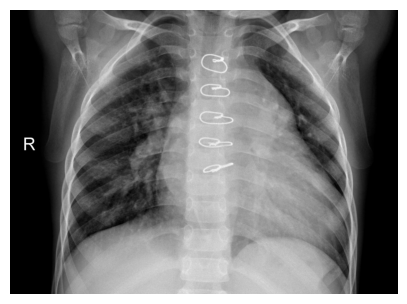

In [10]:
from fastai.vision.core import PILImage
sample_image_path = (path/'train/PNEUMONIA').ls()[0]

img = PILImage.create(sample_image_path)
img.show()

###Q4.
Check the dimensions of the sample image.

In [12]:
img = PILImage.create(img)
img.shape


(1350, 1840)

###Q5.
Define the DataBlock.

\
Hint: The DataBlock may have the following arguments:
* blocks: it should include the ImageBlock and the CategoryBlock
* get_items: define the function to obtain images
* get_y: define the function to obtain labels (based on folder name)
* item_tfms: resize the images to 460 x 460
* batch_tfms: in the augmentation, crop the images to the size 224 x 224; and normalize the images based on the mean and std of ImageNet (`Normalize.from_stats(*imagenet_stats)`)
* splitter: Here we cheat a little bit by using the test set instead of the val set because there are only 16 images in the val set (`GrandparentSplitter(train_name = 'train', valid_name = 'test')`)

In [13]:
pneumonia = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)],
    splitter=GrandparentSplitter(train_name='train', valid_name='test')
)


###Q6.
Pass the DataBlock to the dataloaders.

In [14]:
dls = pneumonia.dataloaders(path, bs=64)


###Q7.
Plot a batch from the dataloaders.

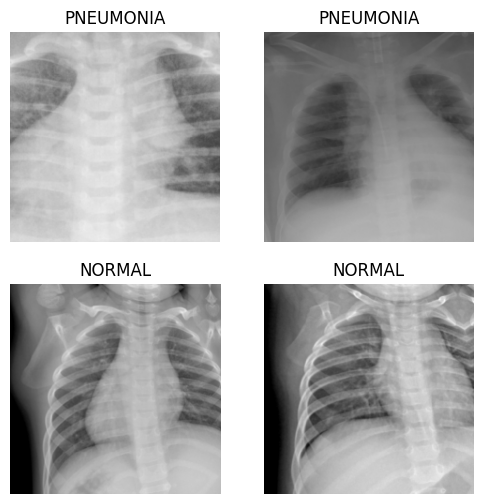

In [17]:
dls.show_batch(max_n=4, nrows=2)


###Q8.
Defin the learner. Use the `vision_learner` function. Use the pre-trained ResNet101 model or feel free to choose your own pre-trained model. Use `error_rate` as the evaluation metrics.

In [18]:
learn = vision_learner(dls, resnet101, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:02<00:00, 81.9MB/s]


###Q9.
Find the optimal learning rate using the lr_find function.

SuggestedLRs(valley=0.0020892962347716093)

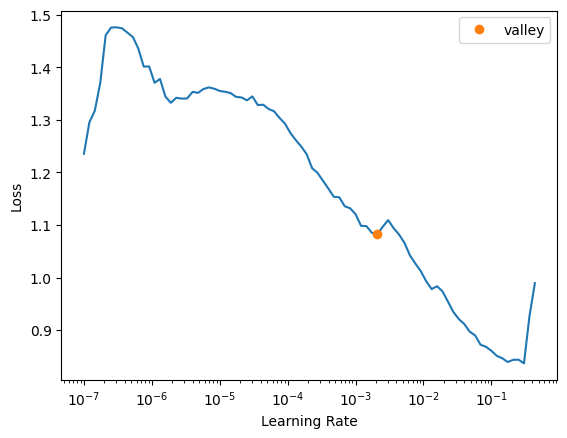

In [19]:
learn.lr_find()


###Q10.
Fine-tune the learner using the optimial learning rate. What is the lowest error rate your model can achieve? At which epoch does your model achieve its miminum error rate?

In [22]:
epochs = 10
base_lr = 0.0020892962347716093

learn.fine_tune(epochs, base_lr)



epoch,train_loss,valid_loss,error_rate,time
0,0.358676,0.512293,0.160256,12:23


epoch,train_loss,valid_loss,error_rate,time
0,0.192160,0.321858,0.110577,06:10
1,0.120199,0.357530,0.120192,06:06
2,0.084324,0.309564,0.091346,06:04
3,0.067795,0.215265,0.068910,06:01
4,0.059958,0.225936,0.062500,06:04
5,0.049467,0.243447,0.064103,06:03
6,0.044166,0.243004,0.075321,06:05
7,0.031113,0.233193,0.056090,06:01
8,0.027134,0.233922,0.057692,05:57
9,0.016297,0.217964,0.054487,05:58


###Q11.
Plot a batch of model prediction results on the test set.

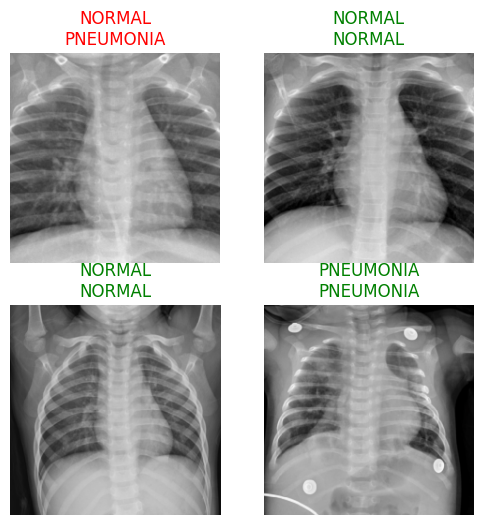

In [28]:

test_dl = dls.test_dl(get_image_files(path/'test'))

learn.show_results(max_n=4)


###Q12.
Plot the confusion matrix.

\
Hint: Some sample code is:
```
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
```

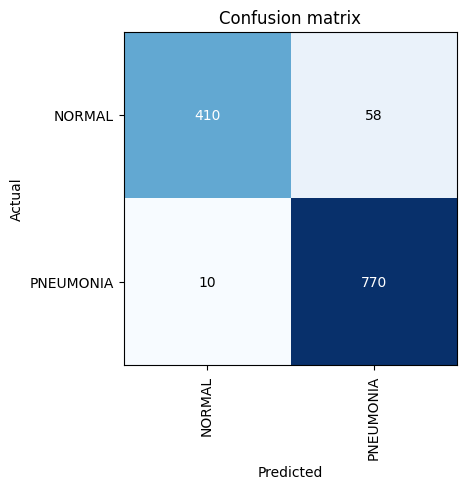

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


###Q13.
Plot the top five losses.

\
Hint: Some sample code:
```
interp.plot_top_losses(5, nrows = 1)
```

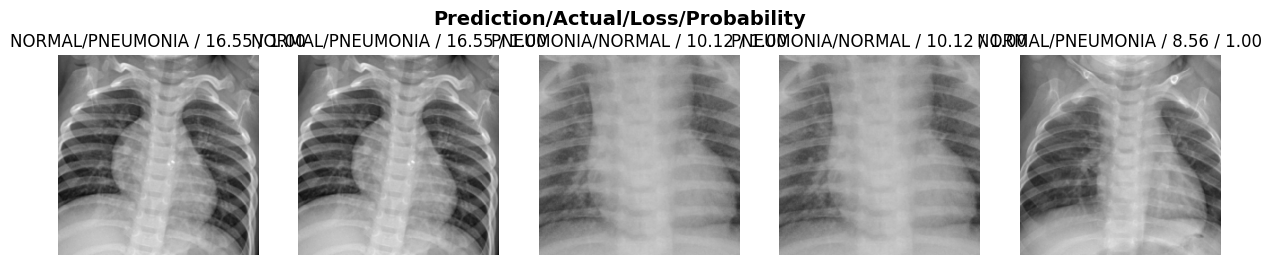

In [30]:
interp.plot_top_losses(5, nrows=1)
